In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import *
# import utils; reload(utils)
# from utils import plots
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
#from keras.utils import to_categorical
from keras.utils.np_utils import to_categorical
from keras.preprocessing import image
from keras import backend as K
#from theano import tensor as K
from scipy import ndimage

import numpy as np
import os
import PIL
from PIL import Image

In [26]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
os.getcwd()

'/nfsroot/data/home/s_jaysetty/Insofe_Cluster/hand_gesture'

In [23]:
# VGG model definition
def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224,3)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

# Load the VGG weigths

# path_weights_th = '/Users/Apple/Downloads/Insofe/AI/Transfer_Learning/20170916_Batch_29_CSE7321c_Transfer_Learning/vgg16_weights_th_dim_ordering_th_kernels.h5'
path_weights_tf = '/nfsroot/data/home/s_jaysetty/Insofe_Cluster/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
#theano
model = VGG_16(path_weights_tf)

#tensorflow
# model = VGG_16('vgg16_weights_tf_dim_ordering_tf_kernels.h5')

/nfsroot/data/home/s_jaysetty/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/nfsroot/data/home/s_jaysetty/.local/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
/nfsroot/data/home/s_jaysetty/.local/lib/python2.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/nfsroot/data/home/s_jaysetty/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  del sys.path[0]
/nfsroot/data/home/s_jaysetty/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 

In [6]:
size = 224

def read_image(f):
    try: #read only jpgs (Add this)
        im = Image.open(f)
        im = im.resize((size, size), PIL.Image.NEAREST)
        im = np.asarray(im, dtype='float64')
        if len(im.shape)==2:
            im = im.reshape(im.shape[0],im.shape[1],1)
            im = im.repeat(3,axis=2)
        if im.shape[2]!=3:
            im = im[:,:,:3]
        im[:,:,0] -= 103.939
        im[:,:,1] -= 116.779
        im[:,:,2] -= 123.68
        im = im.reshape(1,224,224,3)
        return(im)
    except:
        print(f,im.shape)

In [25]:
# Basic Check of read_image
path = '/home/s_jaysetty/Insofe_Cluster/hand_gesture/Triesch/'
im = read_image(path + 'kbrauei1.pgm')
# im = read_image('/home/s_jaysetty/Insofe_Cluster/hand_gesture/Triesch/bfritza2.pgm')
print(im.shape)
# model.layers[32]

(1, 224, 224, 3)


In [26]:
# with a Sequential model, get output of only 33rd layer
get_33rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[32].output])
layer_output = get_33rd_layer_output([im])[0]
#print(layer_output.shape)

In [27]:
img_files = []
path = '/home/s_jaysetty/Insofe_Cluster/hand_gesture/Triesch'
for root, dirs, files in os.walk(path):
   img_files.extend(files)
print(len(img_files))
print(img_files[:10])

718
['bfritza1.pgm', 'bfritza2.pgm', 'bfritza3.pgm', 'bfritzb1.pgm', 'bfritzb2.pgm', 'bfritzb3.pgm', 'bfritzc1.pgm', 'bfritzc2.pgm', 'bfritzc3.pgm', 'bfritzd1.pgm']


In [28]:
n_files = len(img_files)
print('Total number of images:', n_files)

#train_size = 2000
#for demo
train_size = 10
sample_size = max(n_files,train_size)
print('Sample images taken:', sample_size)
sample = [img_files[i] for i in np.random.choice(len(img_files),size=sample_size, replace=False)]
print(sample[:10])
print(len(sample))

('Total number of images:', 718)
('Sample images taken:', 718)
['tmaurel3.pgm', 'jwieghv2.pgm', 'gbanavh3.pgm', 'gbanavc3.pgm', 'nkruega2.pgm', 'szadela2.pgm', 'umaschb1.pgm', 'saginsh2.pgm', 'kbrauel1.pgm', 'mrinnel3.pgm']
718


In [35]:
# Delete the README file in the images folder
i=0
x_train = []
y_train = []
path = '/home/s_jaysetty/Insofe_Cluster/hand_gesture/Triesch/'
print('Reading train images ...')
for file in sample[:574]:
    if(i%100==0):
        print("Read {} images".format(i))
    im = read_image(path+file)
#         im = read_image('/home/s_jaysetty/Insofe_Cluster/hand_gesture/Triesch/'+file)
    temp = get_33rd_layer_output([im])[0]
    x_train.append(temp[0])
    y_train.extend([0 if file[6]=='a' else
          1 if file[6]=='b' else 
          2 if file[6]=='c' else 
          3 if file[6]=='d' else
          4 if file[6]=='g' else
          5 if file[6]=='h' else
          6 if file[6]=='i' else
          7 if file[6]=='l' else
          8 if file[6]=='v' else 9])
        
    i+=1

Reading train images ...
Read 0 images
Read 100 images
Read 200 images
Read 300 images
Read 400 images
Read 500 images


In [36]:
# Read the val images 
j=0
x_val = []
y_val = []
print('Reading val images ...')
path = '/home/s_jaysetty/Insofe_Cluster/hand_gesture/Triesch/'
for file in sample[574:]:
    if(j%50==0):
        print('Read {} images'.format(j))
    im = read_image(path+file)
    temp = get_33rd_layer_output([im])[0]
    x_val.append(temp[0])
    y_val.extend([0 if file[6]=='a' else
          1 if file[6]=='b' else 
          2 if file[6]=='c' else 
          3 if file[6]=='d' else
          4 if file[6]=='g' else
          5 if file[6]=='h' else
          6 if file[6]=='i' else
          7 if file[6]=='l' else
          8 if file[6]=='v' else 9])
    j+=1

Reading val images ...
Read 0 images
Read 50 images
Read 100 images


In [9]:
#Data augmentation
gen = image.ImageDataGenerator(
    rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, 
    shear_range=0.15, zoom_range=0.1, channel_shift_range=10., horizontal_flip=True)

In [10]:
# Create a 'batch' of a single image
# img = np.expand_dims(ndimage.imread('/home/s_jaysetty/Insofe_Cluster/hand_gesture/Triesch/bfritza2.pgm'),0)
img = read_image('/home/s_jaysetty/Insofe_Cluster/hand_gesture/Triesch/bfritza2.pgm')
# Request the generator to create batches from this image
aug_iter = gen.flow(img)

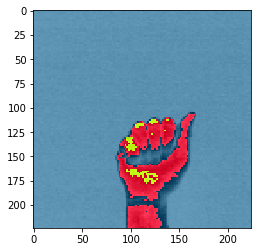

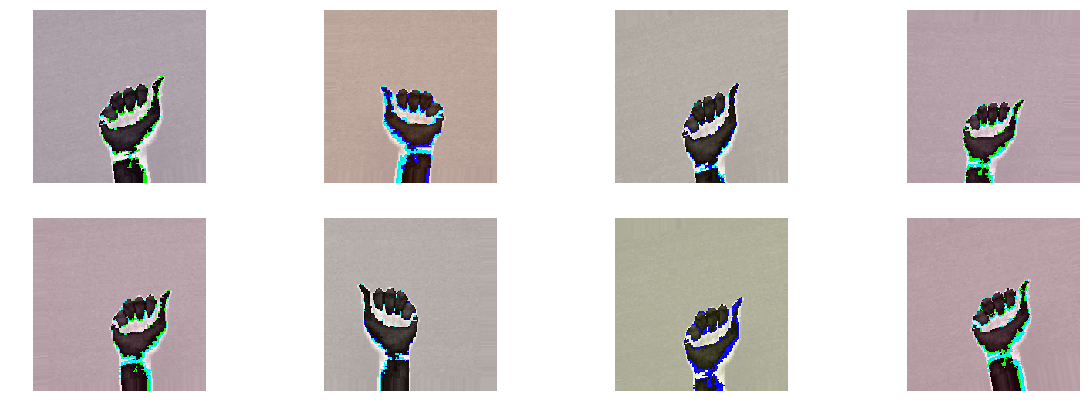

In [28]:
# Get eight examples of these augmented images
aug_imgs = [next(aug_iter)[0].astype(np.uint8) for i in range(8)]

# The original
plt.imshow(img[0])

# Augmented data
plots(aug_imgs, (20,7), 2)

In [30]:
def get_batches(dirname, gen=image.ImageDataGenerator(), shuffle=True, batch_size=4, class_mode='categorical',
                target_size=(224,224)):
    return gen.flow_from_directory(dirname, target_size=target_size,
            class_mode=class_mode, shuffle=shuffle, batch_size=batch_size)

In [32]:
# batch_size = 64
# batches = get_batches(path, gen, batch_size=batch_size)

In [37]:
# print(type(x_train), type(y_train))
# # print(type(x_val), type(y_val))
# print(x_train.shape, y_train.shape)

# x_train = np.array(x_train)
# print(x_train.shape, 'x_train Shape')

y_train = to_categorical(y_train)
y_train = np.array(y_train)
print(y_train.shape, 'y_train Shape')

# x_val = np.array(x_val)
# print(x_val.shape, 'x_train Shape')

y_val = to_categorical(y_val)
y_val = np.array(y_val)
print(y_val.shape, 'y_val Shape')

print(type(x_train), type(y_train))
# print(type(x_val), type(y_val))

((574, 10), 'y_train Shape')
((144, 10), 'y_val Shape')
(<type 'list'>, <type 'numpy.ndarray'>)


In [16]:
# Add the MLP Layer

mlp = Sequential()
mlp.add(Dense(256, input_dim=4096, activation='relu'))
mlp.add(Dropout(0.5))
mlp.add(Dense(256, activation='relu'))
mlp.add(Dropout(0.5))
mlp.add(Dense(10, activation='sigmoid'))#try dense as 1 and sigmoid
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               1048832   
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 1,117,194
Trainable params: 1,117,194
Non-trainable params: 0
_________________________________________________________________


In [39]:
#adam = Adam(lr=0.1)
mlp.compile(optimizer='Adam', 
            loss='categorical_crossentropy', 
            metrics=['acc'])

# mlp.fit(np.array(x_train), y_train, nb_epoch=2)
mlp.fit(np.array(x_train), y_train, nb_epoch=80, validation_data=(np.array(x_val), y_val))

Train on 574 samples, validate on 144 samples
Epoch 1/80
574/574 [==============================] - 0s - loss: 1.9028 - acc: 0.3484 - val_loss: 1.6800 - val_acc: 0.3056
Epoch 2/80
574/574 [==============================] - 0s - loss: 1.6982 - acc: 0.3449 - val_loss: 1.6778 - val_acc: 0.3125
Epoch 3/80
574/574 [==============================] - 0s - loss: 1.6662 - acc: 0.3746 - val_loss: 1.6502 - val_acc: 0.3264
Epoch 4/80
574/574 [==============================] - 0s - loss: 1.6384 - acc: 0.3693 - val_loss: 1.6662 - val_acc: 0.3194
Epoch 5/80
574/574 [==============================] - 0s - loss: 1.6336 - acc: 0.3571 - val_loss: 1.8523 - val_acc: 0.2986
Epoch 6/80
574/574 [==============================] - 0s - loss: 1.6243 - acc: 0.3780 - val_loss: 1.6604 - val_acc: 0.2986
Epoch 7/80
574/574 [==============================] - 0s - loss: 1.6151 - acc: 0.3659 - val_loss: 1.6880 - val_acc: 0.2986
Epoch 8/80
574/574 [==============================] - 0s - loss: 1.6505 - acc: 0.3606 - val_l

574/574 [==============================] - 0s - loss: 0.9202 - acc: 0.6533 - val_loss: 0.9286 - val_acc: 0.6944
Epoch 67/80
574/574 [==============================] - 0s - loss: 0.9250 - acc: 0.6324 - val_loss: 0.9630 - val_acc: 0.7153
Epoch 68/80
574/574 [==============================] - 0s - loss: 0.7624 - acc: 0.6812 - val_loss: 0.8850 - val_acc: 0.7153
Epoch 69/80
574/574 [==============================] - 0s - loss: 0.9138 - acc: 0.6760 - val_loss: 0.9260 - val_acc: 0.6875
Epoch 70/80
574/574 [==============================] - 0s - loss: 0.8378 - acc: 0.6829 - val_loss: 0.9039 - val_acc: 0.7153
Epoch 71/80
574/574 [==============================] - 0s - loss: 0.8328 - acc: 0.6568 - val_loss: 0.8537 - val_acc: 0.7083
Epoch 72/80
574/574 [==============================] - 0s - loss: 0.7614 - acc: 0.6864 - val_loss: 0.8744 - val_acc: 0.7083
Epoch 73/80
574/574 [==============================] - 0s - loss: 0.8048 - acc: 0.6777 - val_loss: 0.7143 - val_acc: 0.7153
Epoch 74/80
574/574 

In [ ]:
prediction = mlp.predict(x_test, batch_size=50)
print(prediction[:3])
print(prediction.shape)
pred_class = mlp.predict_classes(x_test, batch_size=50)